# 単位根検定
単位根検定の1手法であるADF検定(拡張ディッキー・フラー検定)をやる。  
[こちら](https://github.com/Gin04gh/datascience/blob/master/samples_python/adf_test_statsmodels.ipynb)のGitをそのままやっただけ。  

# 拡張ディッキー・フラー検定について
- 時系列のサンプルデータ（確率過程の生成値）が、単位根過程（非定常過程）であるかどうかを調べたい時に利用する検定  
- 帰無仮説「非定常過程である」(ランダムウォーク過程である)
  - 非定常過程であることを棄却し、定常過程であるとみなしてよいかどうかを確認する  

In [6]:
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 26.0MB/s 
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import numpy as np
import pandas as pd

# https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like

import matplotlib
import matplotlib.pylab as plt
from pandas_datareader import data, wb
from statsmodels.tsa import stattools

In [8]:
# データ

start = "2016-08-01"
end = "2017-08-01"
price = data.DataReader("NIKKEI225", "fred", start, end) # 日経平均株価 from セントルイス連邦準備銀行
display(price.head(5))

,NIKKEI225
DATE,
2016-08-01,16635.77
2016-08-02,16391.45
2016-08-03,16083.11
2016-08-04,16254.89
2016-08-05,16254.45


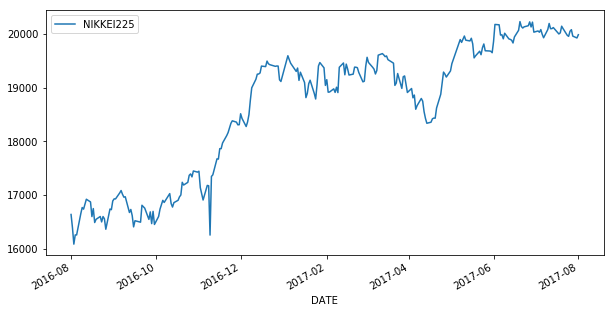

In [9]:
# 原系列プロット

price_tmp = price.dropna()
price_tmp.plot(figsize=(10,5))
plt.show()

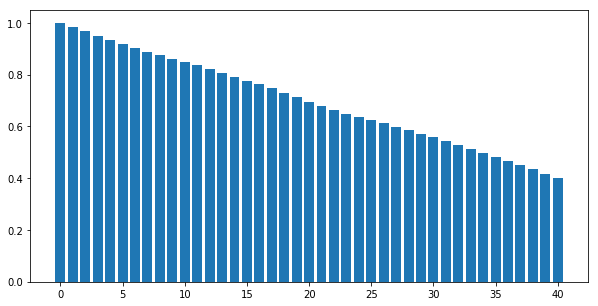

In [15]:
# 原系列における自己相関係数

price_tmp = price.dropna()
acf = stattools.acf(x=price_tmp)
plt.figure(figsize=(10,5))
plt.bar(range(len(acf)), acf)
plt.show()

In [25]:
# 原系列に対する拡張ディッキー-フラー（ADF）検定
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

price_tmp = price.dropna()
res_ctt = stattools.adfuller(x=price_tmp["NIKKEI225"], 
                             regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = stattools.adfuller(x=price_tmp["NIKKEI225"], 
                            regression="ct") # トレンド項あり（１次）、定数項あり
res_c = stattools.adfuller(x=price_tmp["NIKKEI225"], 
                           regression="c") # トレンド項なし、定数項あり
res_nc = stattools.adfuller(x=price_tmp["NIKKEI225"], 
                            regression="nc") # トレンド項なし、定数項なし
print('====res-ctt====')
print('adf_test_static:{}'.format(res_ctt[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_ctt[1]))
print('usedlag:{}'.format(res_ctt[2]))
print('nobs:{}'.format(res_ctt[3]))
print('critical values:{}'.format(res_ctt[4])) # 棄却点
print('icbest:{}'.format(res_ctt[5])) # maximized information criterion

print('====res-ct====')
print('adf_test_static:{}'.format(res_ct[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_ct[1]))
print('usedlag:{}'.format(res_ct[2]))
print('nobs:{}'.format(res_ct[3]))
print('critical values:{}'.format(res_ct[4])) # 棄却点
print('icbest:{}'.format(res_ct[5])) # maximized information criterion

print('====res-c====')
print('adf_test_static:{}'.format(res_c[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_c[1]))
print('usedlag:{}'.format(res_c[2]))
print('nobs:{}'.format(res_c[3]))
print('critical values:{}'.format(res_c[4])) # 棄却点
print('icbest:{}'.format(res_c[5])) # maximized information criterion

print('====res-nc====')
print('adf_test_static:{}'.format(res_nc[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_nc[1]))
print('usedlag:{}'.format(res_nc[2]))
print('nobs:{}'.format(res_nc[3]))
print('critical values:{}'.format(res_nc[4])) # 棄却点
print('icbest:{}'.format(res_nc[5])) # maximized information criterion

====res-ctt====
adf_test_static:-2.6708678219785043
pvalue:0.4709510156594324
usedlag:1
nobs:245
critical values:{'1%': -4.419048225025287, '5%': -3.856711021105152, '10%': -3.568289644722862}
icbest:3022.9312013403046
====res-ct====
adf_test_static:-2.0935231326737878
pvalue:0.5497217494871678
usedlag:1
nobs:245
critical values:{'1%': -3.996204153626465, '5%': -3.428563622657226, '10%': -3.1376703806237196}
icbest:3023.2796069397737
====res-c====
adf_test_static:-1.465787174452998
pvalue:0.5503629828822139
usedlag:1
nobs:245
critical values:{'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}
icbest:3023.332617028609
====res-nc====
adf_test_static:1.3888258295690679
pvalue:0.958418587844728
usedlag:1
nobs:245
critical values:{'1%': -2.5749261391087046, '5%': -1.9421502633766543, '10%': -1.6157794081377657}
icbest:3024.1825324119814


上記の検定の結果、いずれの場合においても帰無仮説を棄却できなかった。
なので、続いて差分をとって再度検定をしてみる。

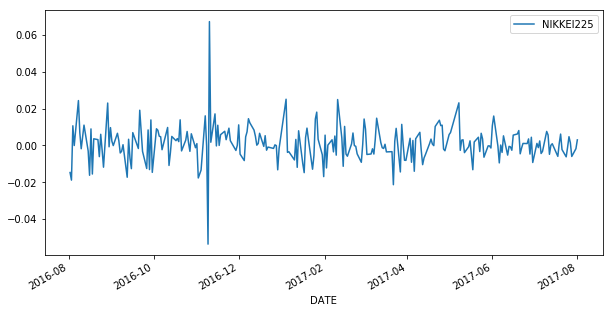

In [12]:
# 差分系列プロット

price_tmp = price.dropna()
price_tmp = price_tmp.pct_change().dropna() # pct_changeだと、前ステップとの「変化率」を取得できる
price_tmp.plot(figsize=(10,5))
plt.show()

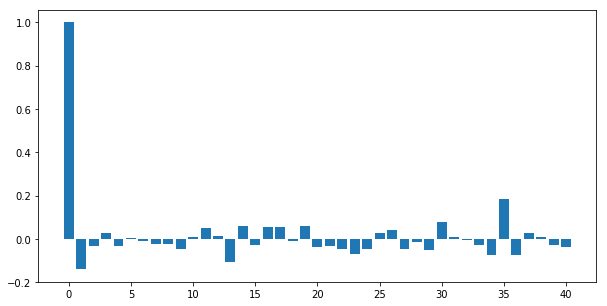

In [13]:
# 差分系列における自己相関係数

price_tmp = price.dropna()
price_tmp = price_tmp.diff().dropna() # diffで前ステップとの差分を取得
acf = stattools.acf(price_tmp)
plt.figure(figsize=(10,5))
plt.bar(range(len(acf)), acf)
plt.show()

In [26]:
# 差分系列に対するADF検定

price_tmp = price.dropna()
price_tmp = price_tmp.diff().dropna()
res_ctt = stattools.adfuller(x=price_tmp["NIKKEI225"], regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = stattools.adfuller(x=price_tmp["NIKKEI225"], regression="ct") # トレンド項あり（１次）、定数項あり
res_c = stattools.adfuller(x=price_tmp["NIKKEI225"], regression="c") # トレンド項なし、定数項あり
res_nc = stattools.adfuller(x=price_tmp["NIKKEI225"], regression="nc") # トレンド項なし、定数項なし


print('====res-ctt====')
print('adf_test_static:{}'.format(res_ctt[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_ctt[1]))
print('usedlag:{}'.format(res_ctt[2]))
print('nobs:{}'.format(res_ctt[3]))
print('critical values:{}'.format(res_ctt[4])) # 棄却点
print('icbest:{}'.format(res_ctt[5])) # maximized information criterion

print('====res-ct====')
print('adf_test_static:{}'.format(res_ct[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_ct[1]))
print('usedlag:{}'.format(res_ct[2]))
print('nobs:{}'.format(res_ct[3]))
print('critical values:{}'.format(res_ct[4])) # 棄却点
print('icbest:{}'.format(res_ct[5])) # maximized information criterion

print('====res-c====')
print('adf_test_static:{}'.format(res_c[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_c[1]))
print('usedlag:{}'.format(res_c[2]))
print('nobs:{}'.format(res_c[3]))
print('critical values:{}'.format(res_c[4])) # 棄却点
print('icbest:{}'.format(res_c[5])) # maximized information criterion

print('====res-nc====')
print('adf_test_static:{}'.format(res_nc[0])) # 絶対値が棄却点より大きければ、帰無仮説を棄却できる。
print('pvalue:{}'.format(res_nc[1]))
print('usedlag:{}'.format(res_nc[2]))
print('nobs:{}'.format(res_nc[3]))
print('critical values:{}'.format(res_nc[4])) # 棄却点
print('icbest:{}'.format(res_nc[5])) # maximized information criterion

====res-ctt====
adf_test_static:-18.000023264087368
pvalue:0.0
usedlag:0
nobs:245
critical values:{'1%': -4.419048225025287, '5%': -3.856711021105152, '10%': -3.568289644722862}
icbest:3015.086682065237
====res-ct====
adf_test_static:-18.03312612885085
pvalue:0.0
usedlag:0
nobs:245
critical values:{'1%': -3.996204153626465, '5%': -3.428563622657226, '10%': -3.1376703806237196}
icbest:3013.0968669700524
====res-c====
adf_test_static:-18.04527915178114
pvalue:2.6499198050041372e-30
usedlag:0
nobs:245
critical values:{'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}
icbest:3011.6923210889313
====res-nc====
adf_test_static:-17.939018358965523
pvalue:5.420744259433138e-29
usedlag:0
nobs:245
critical values:{'1%': -2.5749261391087046, '5%': -1.9421502633766543, '10%': -1.6157794081377657}
icbest:3011.9270493988874


差分に対してADF検定をしたら、「非定常過程である」という帰無仮説を棄却できた。  
なので、この差分系列に対してvarモデル等を適用していく形になる。